## Import packages

In [1]:
import pandas as pd
import numpy as np
import copy
from utils.credit_score_values import substitute
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("./data/german.data", sep=" ", header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df_vis = copy.deepcopy(data_df)
df_vis = substitute(df_vis)

In [4]:
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


## Observation:

<AxesSubplot:xlabel='Cost Matrix(Risk)', ylabel='count'>

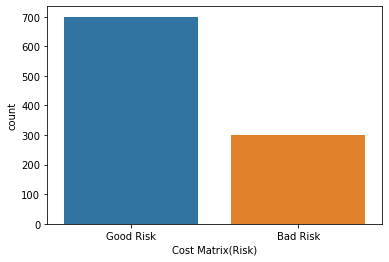

In [5]:
import seaborn as sns
sns.countplot(x="Cost Matrix(Risk)", data=df_vis)

### Data is Imbalanced

## Install imblearn if not available

In [5]:
!pip install imblearn

## Balance the data with SMOTE approch

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [7]:
columns = df_vis.columns
columns_data = {}

new_data = copy.deepcopy(df_vis)
for column in columns:
    if new_data[column].dtype != int:
        columns_data[column] = new_data[column].unique()
        for i in range(len(columns_data[column])):
#             print(new_data.loc[:,column])
            new_data.loc[:,column][new_data[column]==columns_data[column][i]] = int(i)
        new_data[column] = pd.to_numeric(new_data[column])
    
new_data.head()

<ipython-input-7-605071dfa309>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[:,column][new_data[column]==columns_data[column][i]] = int(i)


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,0,6,0,0,1169,0,0,4,0,0,...,0,67,0,0,2,0,1,0,0,0
1,1,48,1,0,5951,1,1,2,1,0,...,0,22,0,0,1,0,1,1,0,1
2,2,12,0,1,2096,1,2,2,0,0,...,0,49,0,0,1,1,2,1,0,0
3,0,42,1,2,7882,1,2,2,0,1,...,1,45,0,1,1,0,2,1,0,0
4,0,24,2,3,4870,1,1,3,0,0,...,2,53,0,1,2,0,2,1,0,1


In [8]:
X,y = new_data.drop("Cost Matrix(Risk)", axis="columns"),new_data["Cost Matrix(Risk)"]

### Check Risk Data Count and Balance the Data

In [9]:
y.value_counts()

0    700
1    300
Name: Cost Matrix(Risk), dtype: int64

In [10]:
X_sm,y_sm = smote.fit_resample(X,y)

In [11]:
y_sm.value_counts()

0    700
1    700
Name: Cost Matrix(Risk), dtype: int64

## Devide the test set is equal set for risk

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [14]:
y_train.value_counts()

0    560
1    560
Name: Cost Matrix(Risk), dtype: int64

In [15]:
y_test.value_counts()

0    140
1    140
Name: Cost Matrix(Risk), dtype: int64

## Train the model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc

print("Random Forest")
clf  = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}", end="\n\n")

Random Forest
Accuracy: 0.7964285714285714
Recall: 0.7964285714285714
Precision: 0.7964285714285714
F1-score: 0.796218031384466



### Analyse the model

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[116,  24],
       [ 33, 107]])

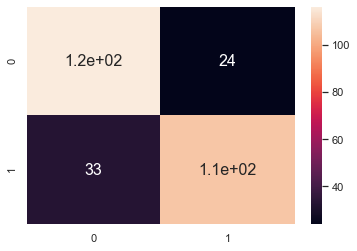

In [43]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

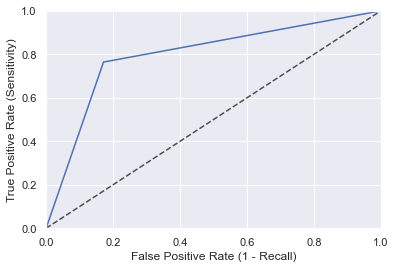



Area Under Curve: 0.80




In [45]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

#### Save the Model

In [46]:
from joblib import dump, load

dump(clf, './models/credit_risk.model') 

['./models/credit_risk.model']

In [47]:
from joblib import dump, load
import copy
import pandas as pd


class CreditScoreModel:
    def __init__(self):
        self.model = load("./models/credit_risk.model")

    classes = ("Good Risk", "Bad Risk")

    def numerate_data(self, query_data):
        x = [query_data]
        data = {k:[] for k in self.column_data.keys()}
        for obj in x:
            for key,value in obj.items():
                if not obj[key].isdigit():
                    data[self.key_map[key]].append(self.column_data[self.key_map[key]].index(value))
                else:
                    data[self.key_map[key]].append(int(value))
        return pd.DataFrame(data)

    
    def predict(self, query_data):
        x = self.numerate_data(query_data)
        prediction = self.model.predict(x)[0]
        return self.classes[prediction]

    column_data = {
        "Status of existing checking account": [
            "<0 DM",
            "0 <= <200 DM",
            "no checking account",
            ">= 200 DM "
        ],
        "Credit history": [
            "critical account",
            "existing credits paid back duly till now",
            "delay in paying off",
            "no credits taken",
            "all credits at this bank paid back duly"
        ],
        "Purpose": [
            "radio/television",
            "education",
            "furniture/equipment",
            "car (new)",
            "car (used)",
            "business",
            "domestic appliances",
            "repairs",
            "others",
            "retraining"
        ],
        "Savings account/bonds": [
            "no savings account",
            "<100 DM",
            "500 <= < 1000 DM",
            ">= 1000 DM",
            "100 <= <500 DM"
        ],
        "Present employment since": [
            ">=7 years",
            "1<= < 4 years",
            "4<= <7 years",
            "unemployed",
            "<1 years"
        ],
        "Personal status and sex": [
            "male:single",
            "female:divorced/separated/married",
            "male:divorced/separated",
            "male:married/widowed"
        ],
        "Other debtors / guarantors": [
            "none",
            "guarantor",
            "co-applicant"
        ],
        "Property": [
            "real estate",
            "savings agreement/life insurance",
            "unknown / no property",
            "car or other"
        ],
        "Other installment plans": [
            "none",
            "bank",
            "store"
        ],
        "Housing": [
            "own",
            "for free",
            "rent"
        ],
        "Job": [
            "skilled employee / official",
            "unskilled - resident",
            "management/ highly qualified employee",
            "unemployed/ unskilled  - non-resident"
        ],
        "Telephone": [
            "yes",
            "none"
        ],
        "foreign worker": [
            "yes",
            "no"
        ],
        "Duration in month": [],
        "Credit amount": [],
        "Installment rate in percentage of disposable income": [],
        "Present residence since": [],
        "Age in years": [],
        "Number of existing credits at this bank": [],
        "Number of people being liable to provide maintenance for": [],
    }

    key_map = {
        "Status_of_existing_checking_account": "Status of existing checking account",
        "Credit_history": "Credit history",
        "Purpose": "Purpose",
        "Savings_account_bonds": "Savings account/bonds",
        "Present_employment_since": "Present employment since",
        "Personal_status_and_sex": "Personal status and sex",
        "Other_debtors_guarantors": "Other debtors / guarantors",
        "Property": "Property",
        "Other_installment_plans": "Other installment plans",
        "Housing": "Housing",
        "Job": "Job",
        "Telephone": "Telephone",
        "foreign_worker": "foreign worker",
        "Duration_in_month": "Duration in month",
        "Credit_amount": "Credit amount",
        "Installment_rate_in_percentage_of_disposable_income": "Installment rate in percentage of disposable income",
        "Present_residence_since": "Present residence since",
        "Age_in_years": "Age in years",
        "Number_of_existing_credits_at_this_bank": "Number of existing credits at this bank",
        "Number_of_people_being_liable_to_provide_maintenance_for": "Number of people being liable to provide maintenance for",
    }


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
import requests
from flask import request,render_template


import traceback

app = Flask(__name__, template_folder='templates')
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return """
 <html>
    <body>
    <h2>Predict Credit score</h2>
    <div>
  <form action="/predict" method="POST">
    <label for="input">Status of existing checking account</label>
    <select id="inputStatus" name="Status_of_existing_checking_account">
      <option value="<0 DM"><0 DM</option>
      <option value="0 <= <200 DM">0 <= <200 DM</option>
      <option value="no checking account">no checking account</option>
      <option value=">= 200 DM ">>= 200 DM </option>
    </select>
    <br>
    <label for="input">Duration in month</label>
    <input type="int" id="inputDur" name="Duration_in_month">
    <br>
    <label for="input">Credit history</label>
    <select id="inputHis" name="Credit_history">
      <option value="critical account">critical account</option>
      <option value="existing credits paid back duly till now">existing credits paid back duly till now</option>
      <option value="delay in paying off">delay in paying off</option>
      <option value="no credits taken">no credits taken</option>
      <option value="all credits at this bank paid back duly">all credits at this bank paid back duly</option>
    </select>
    <br>
    <label for="input">Purpose</label>
    <select id="inputPurpose" name="Purpose">
      <option value="radio/television">radio/television</option>
      <option value="education">education</option>
      <option value="furniture/equipment">furniture/equipment</option>
      <option value="car (new)">car (new)</option>
      <option value="car (used)">car (used)</option>
      <option value="business">business</option>
      <option value="domestic appliances">domestic appliances</option>
      <option value="repairs">repairs</option>
      <option value="others">others</option>
      <option value="retraining">retraining</option>
    </select>
    <br>
    <label for="input">Credit amount</label>
    <input type="text" id="inputAmt" name="Credit_amount">
    <br>
    <label for="input">Savings account/bonds</label>
    <select id="inputSavings" name="Savings_account_bonds">
      <option value="no savings account">no savings account</option>
      <option value="<100 DM"><100 DM</option>
      <option value="500 <= < 1000 DM">500 <= < 1000 DM</option>
      <option value=">= 1000 DM">>= 1000 DM</option>
      <option value="100 <= <500 DM">100 <= <500 DM</option>
    </select>
    <br>
    <label for="input">Present employment since</label>
    <select id="inputEmp" name="Present_employment_since">
      <option value=">=7 years">>=7 years</option>
      <option value="1<= < 4 years">1<= < 4 years</option>
      <option value="4<= <7 years">4<= <7 years</option>
      <option value="unemployed">unemployed</option>
      <option value="<1 years"><1 years</option>
    </select>
    <br>
    <label for="input">Installment rate in percentage of disposable income</label>
    <input type="text" id="inputInstallment" name="Installment_rate_in_percentage_of_disposable_income">
    <br>
    <label for="input">Personal status and sex</label>
    <select id="inputPersonalStatus" name="Personal_status_and_sex">
      <option value="male:single">male:single</option>
      <option value="female:divorced/separated/married">female:divorced/separated/married</option>
      <option value="male:divorced/separated">male:divorced/separated</option>
      <option value="male:married/widowed">male:married/widowed</option>
    </select>
    <br>
    <label for="input">Other debtors / guarantors</label>
    <select id="inputGuarantors" name="Other_debtors_guarantors">
      <option value="none">none</option>
      <option value="guarantor">guarantor</option>
      <option value="co-applicant">co-applican</option>
    </select>
    <br>
    <label for="input">Present residence since</label>
    <input type="text" id="inputResidenceSince" name="Present_residence_since">
    <br>
    <label for="input">Property</label>
    <select id="inputProperty" name="Property">
      <option value="real estate">real estate</option>
      <option value="savings agreement/life insurance">savings agreement/life insurance</option>
      <option value="unknown / no property">unknown / no property</option>
      <option value="car or other"">car or other"</option>
    </select>
    <br>
    <label for="input">Age in years</label>
    <input type="text" id="inputAge" name="Age_in_years">
    <br>
    <label for="input">Other installment plans</label>
    <select id="inputOtherInstallment" name="Other_installment_plans">
      <option value="none">none</option>
      <option value="bank">bank</option>
      <option value="store">store</option>
    </select>
    <br>
    <label for="input">Housing</label>
    <select id="inputHousing" name="Housing">
      <option value="own">own</option>
      <option value="for free">for free</option>
      <option value="rent">rent</option>
    </select>
    <br>
    <label for="input">Number of existing credits at this bank</label>
    <input type="text" id="inputExistingCredit" name="Number_of_existing_credits_at_this_bank">
    <br>
    <label for="input">Job</label>
    <select id="inputJob" name="Job">
      <option value="skilled employee / official">skilled employee / official</option>
      <option value="unskilled - resident">unskilled - resident</option>
      <option value="management/ highly qualified employee">management/ highly qualified employee</option>
      <option value="unemployed/ unskilled  - non-resident">unemployed/ unskilled  - non-resident</option>
    </select>
    <br>
    <label for="input">Number of people being liable to provide maintenance for</label>
    <input type="text" id="inputPeopleLiable" name="Number_of_people_being_liable_to_provide_maintenance_for">
    <br>
    <label for="input">Telephone</label>
    <select id="inputTel" name="Telephone">
      <option value="yes">yes</option>
      <option value="no">no</option>
    </select>
    <br>
    <label for="input">foreign worker</label>
    <select id="inputForeign" name="foreign_worker"">
      <option value="yes">yes</option>
      <option value="no">no</option>
    </select>
    <br>
    <div class="container">
    <form method="post">
        <input type="submit" value="Predict" >
    </form>
</div>
</div>
</body>
</html>"""

@app.route('/predict/', methods=["POST"])
def predictApi():
    result = None
    errors = []
    if request.method == "POST":
        # get url that the user has entered
        try:
            model = CreditScoreModel()
            data = request.form.to_dict()
            result = {"credit_risk": model.predict(data)}
        except Exception as error:
            errors.append(traceback.format_exc())
            errors.append(str(error))
            errors.append(
                "Unable to get the prediction. Please make sure to enter the data and try again."
            )

    return {'result': result if result else errors}
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-124:
Traceback (most recent call last):
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/site-packages/flask_ngrok.py", line 31, in _run_ngrok
    ngrok = subprocess.Popen([executable, 'http', '5000'])
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/purnendukar/opt/anaconda3/lib/python3.8/subprocess.py", line 1706, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_f